<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_4X/blob/main/GQtest_data(y_hat)_multi_delta_(3_2)_n30_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_4X/multiplication_delta_3.2'

In [4]:
os.listdir(base_path)

['data_multi_delta_3.2_n20.csv',
 'data_multi_delta_3.2_n30.csv',
 'data_multi_delta_3.2_n60.csv',
 'data_multi_delta_3.2_n120.csv',
 'data_multi_delta_3.2_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_3.2_n30.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,39.233705,54.600493,31.837472,26.965489,-569.631325,-406.994166,198.765508,-605.759674
1,0.0,1.0,80.247686,23.007312,62.365333,57.844042,-354.774264,-121.309891,96.718163,-218.028054
2,0.0,2.0,48.829853,65.903116,62.272566,59.412405,-306.360162,-59.942222,324.305256,-384.247478
3,0.0,3.0,59.927808,70.634144,55.271941,32.770942,1740.498506,1969.103341,663.552496,1305.550845
4,0.0,4.0,59.370240,87.202148,75.914567,72.714844,498.736468,803.938267,669.549463,134.388804
...,...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,59.379339,85.076907,27.980035,30.615856,1886.320771,2099.372909,333.894485,1765.478424
29996,999.0,26.0,90.695645,60.264642,89.431994,52.667583,1301.893576,1604.953441,677.074938,927.878503
29997,999.0,27.0,72.279166,84.079551,37.431569,82.014465,-612.128573,-326.323822,425.135391,-751.459213
29998,999.0,28.0,33.757034,95.355007,48.233107,40.559185,402.881270,630.785602,92.665411,538.120190


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,39.233705,54.600493,31.837472,26.965489,-569.631325,-406.994166,198.765508,-605.759674
1,0.0,1.0,80.247686,23.007312,62.365333,57.844042,-354.774264,-121.309891,96.718163,-218.028054
2,0.0,2.0,48.829853,65.903116,62.272566,59.412405,-306.360162,-59.942222,324.305256,-384.247478
3,0.0,3.0,59.927808,70.634144,55.271941,32.770942,1740.498506,1969.103341,663.552496,1305.550845
4,0.0,4.0,59.370240,87.202148,75.914567,72.714844,498.736468,803.938267,669.549463,134.388804
...,...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,59.379339,85.076907,27.980035,30.615856,1886.320771,2099.372909,333.894485,1765.478424
29996,999.0,26.0,90.695645,60.264642,89.431994,52.667583,1301.893576,1604.953441,677.074938,927.878503
29997,999.0,27.0,72.279166,84.079551,37.431569,82.014465,-612.128573,-326.323822,425.135391,-751.459213
29998,999.0,28.0,33.757034,95.355007,48.233107,40.559185,402.881270,630.785602,92.665411,538.120190


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4            e  \
rep   index                                                            
0.0   0.0    39.233705  54.600493  31.837472  26.965489  -569.631325   
      1.0    80.247686  23.007312  62.365333  57.844042  -354.774264   
      2.0    48.829853  65.903116  62.272566  59.412405  -306.360162   
      3.0    59.927808  70.634144  55.271941  32.770942  1740.498506   
      4.0    59.370240  87.202148  75.914567  72.714844   498.736468   
...                ...        ...        ...        ...          ...   
999.0 25.0   59.379339  85.076907  27.980035  30.615856  1886.320771   
      26.0   90.695645  60.264642  89.431994  52.667583  1301.893576   
      27.0   72.279166  84.079551  37.431569  82.014465  -612.128573   
      28.0   33.757034  95.355007  48.233107  40.559185   402.881270   
      29.0   67.352245  30.072827  75.757286  76.804374  -114.325962   

                       Y       y_hat        e_hat  
rep   index                                        
0.0   0.0    -406.994166  198.765508  -605.759674  
      1.0    -121.309891   96.718163  -218.028054  
      2.0     -59.942222  324.305256  -384.247478  
      3.0    1969.103341  663.552496  1305.550845  
      4.0     803.938267  669.549463   134.388804  
...                  ...         ...          ...  
999.0 25.0   2099.372909  333.894485  1765.478424  
      26.0   1604.953441  677.074938   927.878503  
      27.0   -326.323822  425.135391  -751.459213  
      28.0    630.785602   92.665411   538.120190  
      29.0    145.660771  252.570119  -106.909348  

[30000 rows x 8 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4            e  \
rep   index                                                            
0.0   0.0    39.233705  54.600493  31.837472  26.965489  -569.631325   
      1.0    80.247686  23.007312  62.365333  57.844042  -354.774264   
      2.0    48.829853  65.903116  62.272566  59.412405  -306.360162   
      3.0    59.927808  70.634144  55.271941  32.770942  1740.498506   
      4.0    59.370240  87.202148  75.914567  72.714844   498.736468   
...                ...        ...        ...        ...          ...   
999.0 25.0   59.379339  85.076907  27.980035  30.615856  1886.320771   
      26.0   90.695645  60.264642  89.431994  52.667583  1301.893576   
      27.0   72.279166  84.079551  37.431569  82.014465  -612.128573   
      28.0   33.757034  95.355007  48.233107  40.559185   402.881270   
      29.0   67.352245  30.072827  75.757286  76.804374  -114.325962   

                       Y       y_hat        e_hat  
rep   index                                        
0.0   0.0    -406.994166  198.765508  -605.759674  
      1.0    -121.309891   96.718163  -218.028054  
      2.0     -59.942222  324.305256  -384.247478  
      3.0    1969.103341  663.552496  1305.550845  
      4.0     803.938267  669.549463   134.388804  
...                  ...         ...          ...  
999.0 25.0   2099.372909  333.894485  1765.478424  
      26.0   1604.953441  677.074938   927.878503  
      27.0   -326.323822  425.135391  -751.459213  
      28.0    630.785602   92.665411   538.120190  
      29.0    145.660771  252.570119  -106.909348  

[30000 rows x 8 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,39.233705,54.600493,31.837472,26.965489,-569.631325,-406.994166,198.765508,-605.759674
1,0.0,1.0,80.247686,23.007312,62.365333,57.844042,-354.774264,-121.309891,96.718163,-218.028054
2,0.0,2.0,48.829853,65.903116,62.272566,59.412405,-306.360162,-59.942222,324.305256,-384.247478
3,0.0,3.0,59.927808,70.634144,55.271941,32.770942,1740.498506,1969.103341,663.552496,1305.550845
4,0.0,4.0,59.370240,87.202148,75.914567,72.714844,498.736468,803.938267,669.549463,134.388804
...,...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,59.379339,85.076907,27.980035,30.615856,1886.320771,2099.372909,333.894485,1765.478424
29996,999.0,26.0,90.695645,60.264642,89.431994,52.667583,1301.893576,1604.953441,677.074938,927.878503
29997,999.0,27.0,72.279166,84.079551,37.431569,82.014465,-612.128573,-326.323822,425.135391,-751.459213
29998,999.0,28.0,33.757034,95.355007,48.233107,40.559185,402.881270,630.785602,92.665411,538.120190


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3         x4            e  \
rep   index                                                            
0.0   0.0    39.233705  54.600493  31.837472  26.965489  -569.631325   
      1.0    80.247686  23.007312  62.365333  57.844042  -354.774264   
      2.0    48.829853  65.903116  62.272566  59.412405  -306.360162   
      3.0    59.927808  70.634144  55.271941  32.770942  1740.498506   
      4.0    59.370240  87.202148  75.914567  72.714844   498.736468   
...                ...        ...        ...        ...          ...   
999.0 25.0   59.379339  85.076907  27.980035  30.615856  1886.320771   
      26.0   90.695645  60.264642  89.431994  52.667583  1301.893576   
      27.0   72.279166  84.079551  37.431569  82.014465  -612.128573   
      28.0   33.757034  95.355007  48.233107  40.559185   402.881270   
      29.0   67.352245  30.072827  75.757286  76.804374  -114.325962   

                       Y       y_hat        e_hat  
rep   index                                        
0.0   0.0    -406.994166  198.765508  -605.759674  
      1.0    -121.309891   96.718163  -218.028054  
      2.0     -59.942222  324.305256  -384.247478  
      3.0    1969.103341  663.552496  1305.550845  
      4.0     803.938267  669.549463   134.388804  
...                  ...         ...          ...  
999.0 25.0   2099.372909  333.894485  1765.478424  
      26.0   1604.953441  677.074938   927.878503  
      27.0   -326.323822  425.135391  -751.459213  
      28.0    630.785602   92.665411   538.120190  
      29.0    145.660771  252.570119  -106.909348  

[30000 rows x 8 columns]

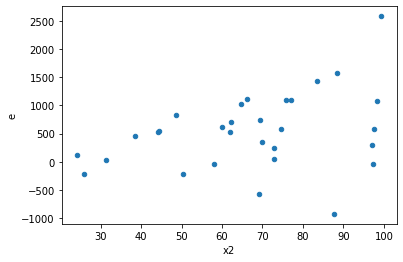

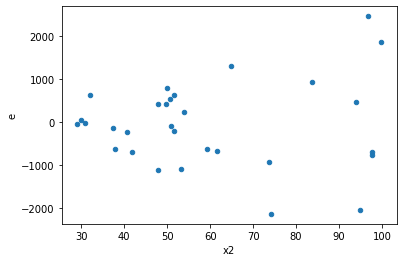

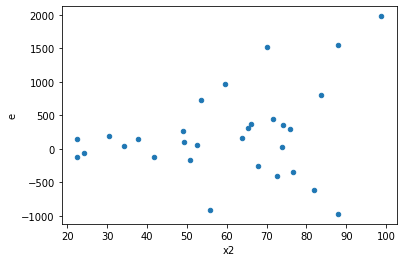

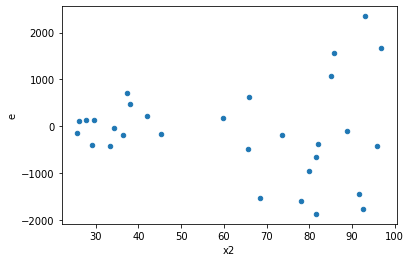

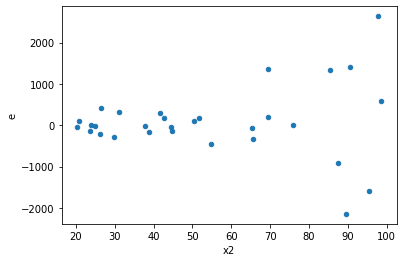

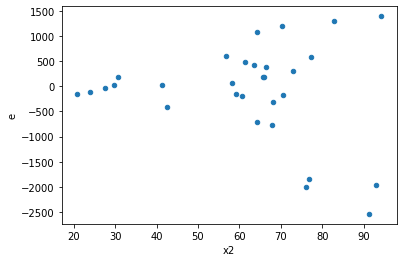

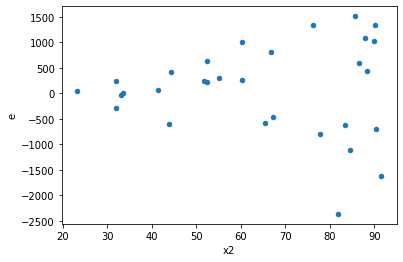

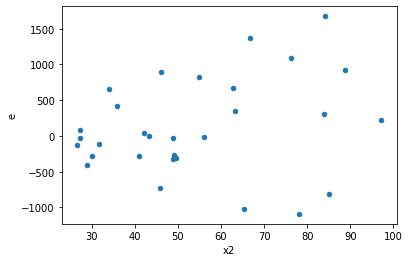

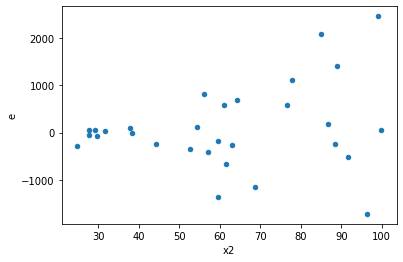

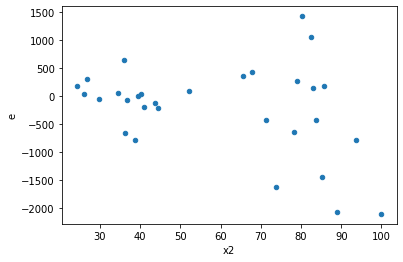

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3', 'x4']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,8.0,8.0,1275866.9854345215,8801112.3278384,159483.37317931518,1100139.0409798,6.898142540181028,0.013078321032359064,0.9934608394838205,0.006539160516179532,Reject005=0 : Heteroscedasticity
2.0,8.0,8.0,3675569.5698961155,9708991.968136929,459446.19623701443,1213623.9960171161,2.641493184527409,0.1910508535619908,0.9044745732190046,0.0955254267809954,Reject005=1 : Homoscedasticity
3.0,8.0,8.0,407620.8170229258,11782122.66428528,50952.60212786573,1472765.33303566,28.904614711133895,8.069696812462723e-05,0.9999596515159377,4.0348484062313617e-05,Reject005=0 : Heteroscedasticity
4.0,8.0,8.0,4495543.8708976,8527359.644905228,561942.9838622,1065919.9556131535,1.8968471646129477,0.3840270133295225,0.8079864933352388,0.19201350666476125,Reject005=1 : Homoscedasticity
5.0,8.0,8.0,3372356.8255703794,8182142.850029976,421544.6031962974,1022767.856253747,2.4262387621588943,0.23146963732308623,0.8842651813384569,0.11573481866154312,Reject005=1 : Homoscedasticity
8.0,8.0,8.0,1127316.0611831257,8156798.1090804655,140914.5076478907,1019599.7636350582,7.235591144261576,0.011215377015634909,0.9943923114921825,0.005607688507817454,Reject005=0 : Heteroscedasticity
10.0,8.0,8.0,1613020.531333817,3237519.77820927,201627.56641672712,404689.97227615875,2.007116286072406,0.34417398101498087,0.8279130094925096,0.17208699050749043,Reject005=1 : Homoscedasticity
11.0,8.0,8.0,2978739.17622088,4711636.307495669,372342.39702761,588954.5384369587,1.5817552423214551,0.5313581703869437,0.7343209148065282,0.26567908519347183,Reject005=1 : Homoscedasticity
12.0,8.0,8.0,293947.0328183099,5842037.560031763,36743.37910228874,730254.6950039704,19.874456646217467,0.0003279515073273398,0.9998360242463363,0.0001639757536636699,Reject005=0 : Heteroscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,8.0,8.0,1275866.9854345215,8801112.3278384,159483.37317931518,1100139.0409798,6.898142540181028,0.013078321032359064,Reject005=0 : Heteroscedasticity
1.0,8.0,8.0,6765243.168920692,1434746.26273689,845655.3961150865,179343.28284211125,0.2120760816592769,0.04187262670604311,Reject005=0 : Heteroscedasticity
2.0,8.0,8.0,3675569.5698961155,9708991.968136929,459446.19623701443,1213623.9960171161,2.641493184527409,0.1910508535619908,Reject005=1 : Homoscedasticity
3.0,8.0,8.0,407620.8170229258,11782122.66428528,50952.60212786573,1472765.33303566,28.904614711133895,8.069696812462723e-05,Reject005=0 : Heteroscedasticity
4.0,8.0,8.0,4495543.8708976,8527359.644905228,561942.9838622,1065919.9556131535,1.8968471646129477,0.3840270133295225,Reject005=1 : Homoscedasticity
5.0,8.0,8.0,3372356.8255703794,8182142.850029976,421544.6031962974,1022767.856253747,2.4262387621588943,0.23146963732308623,Reject005=1 : Homoscedasticity
6.0,8.0,8.0,10314776.966847122,1807038.4711115807,1289347.1208558902,225879.8088889476,0.17518929172386472,0.023672602880233595,Reject005=0 : Heteroscedasticity
7.0,8.0,8.0,1725123.8436910394,1154357.8068120105,215640.48046137992,144294.7258515013,0.6691448912688902,0.5830360078446021,Reject005=1 : Homoscedasticity
8.0,8.0,8.0,1127316.0611831257,8156798.1090804655,140914.5076478907,1019599.7636350582,7.235591144261576,0.011215377015634909,Reject005=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      654
Reject005=0 : Heteroscedasticity    346
Name: Result_test, dtype: int64